In [37]:
# Dependencies
import tweepy
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import style
style.use("ggplot")
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Import Vader Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [16]:
# Target the News Accounts
target = ("@BBC","@CBS","@CNN","@Fox","@NYTimes")

# Variables for DataFrame
media_sources = []
text = []
date = []
tweets_ago = []

# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Tweet Counter
counter = 1

# Loop through each user
for user in target:
    
    # Tweet counter per target
    tweet_count = 0

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1,6):
        
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page = x)
        
        # Loop through all tweets
        for tweet in public_tweets:
            
            # Add to target Tweet count
            tweet_count += 1
            
            # Print Tweets
            print(f"Tweet {counter}: {tweet['text']}")
            
            # Run Vader Analysis
            results = analyzer.polarity_scores(tweet["text"])
            compound = results ["compound"]
            pos = results["pos"]
            neg = results["neg"]
            neu = results["neu"]
            
             # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            media_sources.append(user)
            text.append(tweet['text'])
            date.append(tweet['created_at'])
            tweets_ago.append(tweet_count)      
            
            
            # Add to counter
            counter += 1



Tweet 1: Comedian Romesh Ranganathan travels to Albania to get an insider's guide to the country and to find out whether his… https://t.co/zfyqrKt8MK
Tweet 2: 😂🍗❤️️ @jackwhitehall's theory about dating and Nando's never gets old...  #LiveAtTheApollo

https://t.co/TBdTRVOVet
Tweet 3: The #ThaiCaveRescue boys now know that a volunteer died helping to save them, Thailand’s health ministry says.… https://t.co/Nf4Xk3p8ez
Tweet 4: France have won the World Cup! 

It’s ended #FRA 4-2 #CRO to give the French their second #WorldCup victory. 

👉… https://t.co/MR8ioqCtg7
Tweet 5: RT @BBCSport: GOAL! #FRA 2-1 #CRO 

Griezmann scores from the spot! What a first half this has been.

📺 @BBCOne 
📻 @5liveSport 
📱 https://t…
Tweet 6: Novak Djokovic is the 2018 #Wimbledon champion, beating Kevin Anderson to win the title for the fourth time. 👏 🏆🙌… https://t.co/gXfPxodXCn
Tweet 7: RT @BBCSport: GOAL! #FRA 1-0 #CRO 

It's an own goal!

Griezmann's free-kick flicks off the head of Mandzukic and in.

📺 @BBCO

Tweet 61: Walrus siestas can last a week! 💤 These incredible creatures know how to nap... 

https://t.co/qZRpNBkpuc
Tweet 62: It’s not coming home. 💔

But it's been an incredible journey. ♥️

https://t.co/TrqeqzfTUq  #ENG #WorldCup… https://t.co/nCoN5lDJys
Tweet 63: RT @BBCSport: GOAL

Mario Mandzukic drills Croatia in front.

#CRO 2-1 #ENG 

LIVE:
📱 https://t.co/C5GtYW7jpj 
📻 @5liveSport 

#ENGCRO #Wor…
Tweet 64: RT @BBCSport: Extra-time it is... and we're underway...

How are your nerves?

#CRO 1-1 #ENG 

LIVE:
📱 https://t.co/C5GtYW7jpj 
📻 @5liveSpo…
Tweet 65: Full time: #CRO 1-1 #ENG 

Who's ready for another 30 minutes?

Follow it live: 
📱 https://t.co/TrqeqzfTUq  
📻… https://t.co/CuPZrrxFEW
Tweet 66: RT @BBCBreakfast: No fingernails left... https://t.co/E4oE20owSY
Tweet 67: RT @BBCSport: GOAL 

#CRO 1-1 #ENG 

Ivan Perisic meets a cross to flick Croatia level.

LIVE:
📱 https://t.co/C5GtYW7jpj 
📻 @5liveSport htt…
Tweet 68: It doesn't matter where you're watching, as long as you're 

Tweet 121: Every day is #TakeYourDogToWorkDay for shows like @HawaiiFive0CBS, @MomCBS, @SEALTeamCBS, and @bigbangtheory! https://t.co/DJaOt1VQcw
Tweet 122: Lights, camera, selfie! 📸 Could there be a better photo for #NationalSelfieDay? https://t.co/14Ewx64yKC
Tweet 123: There’s nothing quite like watching a contestant win a brand new car on @PriceIsRight. 👏  https://t.co/aKlFikYAMM
Tweet 124: Time to make your predictions for #BB20! 👏 Get to know the @CBSBigBrother Houseguests before the big premiere next… https://t.co/jlpIchJ9sk
Tweet 125: RT @CBSBigBrother: Meet the cast of #BB20... before anyone else! Start streaming all their live interviews beginning at 11am EST/8am PST on…
Tweet 126: Today and every day we celebrate their love, guidance, and support. Happy #FathersDay to every kind of dad! https://t.co/Wffax1khBH
Tweet 127: Casting Alert! @paulwesley, @DaniaJRamirez &amp; @JamesWolk are set to star in the upcoming CBS All Access psychologica… https://t.co/JnZMrzT92n
Tweet 128: In

Tweet 201: Democratic Sen. Mark Warner says more Americans should be in the Trump-Putin meeting https://t.co/WrAyFtOWS4 https://t.co/84pcNflHYM
Tweet 202: A police officer and bystander have been fatally shot near Boston https://t.co/4LwxEUFkyM https://t.co/muflJbjmpN
Tweet 203: A video released by Russian President Vladimir Putin touting his country's potential future weaponry and its suppos… https://t.co/cX9E5D73RV
Tweet 204: Former NHL goalie Ray Emery dies at 35 https://t.co/MIwS3z505n https://t.co/YEqEL2dXpH
Tweet 205: A video released by Russian President Vladimir Putin touting his country's potential future weaponry and its suppos… https://t.co/ZnqQ3o8Pnv
Tweet 206: Trump administration tries to clarify child reunification plan https://t.co/Kq4jcHm4Uv https://t.co/vNomKJPFmG
Tweet 207: Drake vs. the Beatles? It's time to retire the rap vs. rock cliché, writes Jennifer Lynn Stoever for @CNNOpinion… https://t.co/9a4yiC61pp
Tweet 208: How companies change packaging without alienati

Tweet 261: For the first time, scientists have been able to trace the origins of a ghostly subatomic particle that traveled 3.… https://t.co/PmnXztGKBg
Tweet 262: Georgia woman arrested after cop appears to use coin flip app https://t.co/4yXyMQeLuK https://t.co/Q6w6m88yJx
Tweet 263: Stitch Fix is tapping into the children's apparel market, launching subscription boxes with sizes 2T to 14. Founder… https://t.co/ByTYP3Cl3n
Tweet 264: Democratic Rep. Joyce Beatty dances to Drake's "In My Feelings" to promote millennial voting https://t.co/LkF2rbZ8Lm https://t.co/ggWr7B6m7j
Tweet 265: Meet Care-E, the automated airport assistant that scans a boarding pass, carries luggage and guides passengers to t… https://t.co/E9ZgNpC9nc
Tweet 266: Protesters chanted and threw rocks at Chicago police after an officer shot and killed a man in the city's South Sid… https://t.co/LdeQEteIPM
Tweet 267: How innovation helped save Detroit https://t.co/wb4xo6rauh https://t.co/ksAK3i5brH
Tweet 268: These giant av

Tweet 341: Additionally, using „sexy industry” to describe tech is just another example of sexualisation that women will conti… https://t.co/rFgRgfZR7f
Tweet 342: He could just really look at his own employer, Uber, to learn about the inclusion and moral crisis that tech is cur… https://t.co/I3W252jNqe
Tweet 343: I’m not going any further, because the evidence is there for those who are willing to look for it instead of trying… https://t.co/gmd1QdIfJE
Tweet 344: A good place to start would be to familiarise yourself w/the @KaporCenter Tech Leavers study, portraying why people… https://t.co/McD9ZnlGXf
Tweet 345: The sheer ignorance of white male privilege portrayed in this tweet is a reason why there aren’t more people, espec… https://t.co/BVSYqzUU0a
Tweet 346: @patriciarealini The echo chamber of white dudes seeing tech as easy runs deep, especially at Uber lol
Tweet 347: RT @KimCrayton1: “We need to destigmatize how we view and talk about privilege, and one of the best ways to do so i

Tweet 421: 3 years after a racist blood bath in its fellowship hall, a Charleston church unveiled designs for a contemplative… https://t.co/0epd9q1OQA
Tweet 422: In Opinion

Op-Ed contributor David Bentley Hart writes, "No one elsewhere wants to root for a team like the Yankee… https://t.co/SLK2iO5iDm
Tweet 423: “We had much better defenses,” President Trump said, suggesting that the Russians could not hack the Republican Nat… https://t.co/TJbpCl1tGD
Tweet 424: A Greenpeace paraglider propelled past President Trump with a banner saying “Trump Well Below Par” at a golf resort… https://t.co/AnUO50vpZu
Tweet 425: We have combined all 163 impassioned cries by Telemundo's announcers into one lung-bursting goal call https://t.co/heCP0PG5Ob
Tweet 426: Members of the political activist group Pussy Riot said they staged a disruption of the World Cup final by running… https://t.co/8PENbpQwSp
Tweet 427: Here’s a brief, hilarious and cringe-inducing roundup of some of Sacha Baron Cohen's best and 

In [17]:
# Convert sentiments to a DataFrame
df = pd.DataFrame({ "Media":media_sources,
                           "Tweet":text,
                            "Date":date,
                            "Compound Score":compound_list,
                            "Positive Score": positive_list,
                            "Neutral Score": neutral_list,
                            "Negative Score":negative_list,
                            "Tweets Ago": tweets_ago})

In [18]:
# Rearrange columns of DataFrame 
df = df[["Media","Date","Tweet","Compound Score","Positive Score","Negative Score","Neutral Score", "Tweets Ago"]]

df.head()

,Media,Date,Tweet,Compound Score,Positive Score,Negative Score,Neutral Score,Tweets Ago
0,@BBC,Sun Jul 15 19:28:16 +0000 2018,Comedian Romesh Ranganathan travels to Albania...,0.3818,0.115,0.000,0.885,1
1,@BBC,Sun Jul 15 18:03:07 +0000 2018,😂🍗❤️️ @jackwhitehall's theory about dating and...,0.0000,0.000,0.000,1.000,2
2,@BBC,Sun Jul 15 17:04:03 +0000 2018,The #ThaiCaveRescue boys now know that a volun...,0.2023,0.235,0.157,0.609,3
3,@BBC,Sun Jul 15 16:58:50 +0000 2018,France have won the World Cup! \n\nIt’s ended ...,0.6114,0.166,0.000,0.834,4
4,@BBC,Sun Jul 15 15:41:32 +0000 2018,RT @BBCSport: GOAL! #FRA 2-1 #CRO \n\nGriezman...,0.0000,0.000,0.000,1.000,5


In [19]:
df.to_csv("Sentiments_Analysis_Data.csv")

In [23]:
# Check Dataframe output for constitency or errors
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Media             500 non-null object
Date              500 non-null object
Tweet             500 non-null object
Compound Score    500 non-null float64
Positive Score    500 non-null float64
Negative Score    500 non-null float64
Neutral Score     500 non-null float64
Tweets Ago        500 non-null int64
dtypes: float64(4), int64(1), object(3)
memory usage: 31.3+ KB


In [24]:
# Subset DataFrame by each Media Source 
bbc = df.loc[df["Media"] == "@BBC"]
cbs = df.loc[df["Media"] == "@CBS"]
cnn = df.loc[df["Media"] == "@CNN"]
fox = df.loc[df["Media"] == "@Fox"]
nyt = df.loc[df["Media"] == "@NYTimes"]

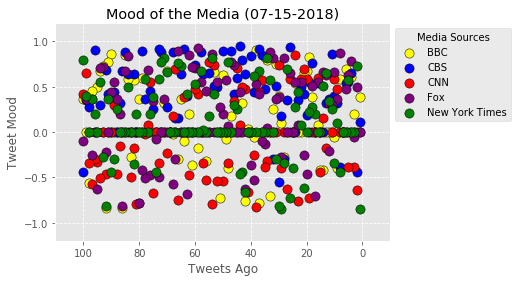

In [33]:
# Create scatter plots
plt.scatter(bbc['Tweets Ago'], bbc['Compound Score'], c='yellow',edgecolor='black', s=85, alpha=1, label='BBC')
plt.scatter(cbs['Tweets Ago'], cbs['Compound Score'], c='blue',edgecolor='black', s=85, alpha=1, label='CBS')
plt.scatter(cnn['Tweets Ago'], cnn['Compound Score'], c='red',edgecolor='black' , s=85, alpha=1, label='CNN')
plt.scatter(fox['Tweets Ago'], fox['Compound Score'], c='purple',edgecolor='black', s=85, alpha=1, label='Fox')
plt.scatter(nyt['Tweets Ago'], nyt['Compound Score'], c='green',edgecolor='black', s=85, alpha=1, label='New York Times')


# Incorporate other Plot features
now = datetime.now()
now = now.strftime("%m-%d-%Y")

plt.title(f"Mood of the Media ({now})") 
plt.xlabel("Tweets Ago")
plt.xlim(110,-10)
plt.ylabel("Tweet Mood")
plt.ylim(-1.2,1.2)
plt.legend(bbox_to_anchor=(1, 1), title='Media Sources')
plt.grid(True, ls='dashed')


# Save file to Output folder
plt.savefig("Mood of the Media via Tweets.png")

plt.show()

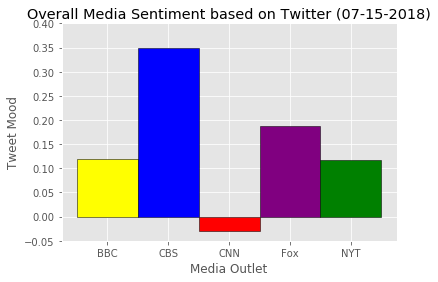

In [42]:
# Create a bar chart
plt.bar(0, bbc['Compound Score'].mean(), edgecolor = 'black', color='yellow', width=1)
plt.bar(1, cbs['Compound Score'].mean(), edgecolor = 'black', color='blue', width=1)
plt.bar(2, cnn['Compound Score'].mean(), edgecolor = 'black', color='red', width=1)
plt.bar(3, fox['Compound Score'].mean(), edgecolor = 'black', color='purple', width=1)
plt.bar(4, nyt['Compound Score'].mean(), edgecolor = 'black', color='green', width=1)


# Incorporate other plot features
plt.title(f"Overall Media Sentiment based on Twitter ({now})")
plt.ylim(-0.05, 0.40)
plt.xlabel("Media Outlet")
plt.ylabel("Tweet Mood")
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYT"]
x_locations = [value for value in np.arange(5)]
plt.xticks(x_locations, x_labels)
 

#Adds a horizontal line at zero
plt.grid(True)

# Save file to Output folder
plt.savefig("Overall Mood of Media Tweets.png")

plt.show()

In [48]:
a = """1. From first glance at the charts you it is hard to tell the sentitment analysis using the scatter
plot.  There is too much data points (tweet from each media source) to try to give accurate correlations.
There is a generalization that all the Media sources look to be generally positive from the compound score.
It is also easy to see that the most negative tweets are coming from CNN."""
b = """2. The bar chart is a great visualization for this data set, as it has one plot for media source.
According to the bar graph most of the news sources are tweeting positive things today.
One very important factor is also to realize the timeframe of  when the analysis was run.  
Today was the world cup and it is also Sunday, which means it is prime day for watching TV shows.
That could be a reason why CBS's tweets have been positive.
If you take a look at CBS twitter you can see it is mostly promotion of its TV shows.  For CNN 
it can also be inferred that they are more along side with negative compound scores.""" 
c = """3. A final piece of analysis is that when running sentiment analysis it is also important to think outside of
the data you have just created.  When running analysis of tweets it is important to
understand that the tweets are comprised of current events happening around the world today.  The target
accounts that are used for this sentiment analysis should also be taken into consideration.
For example most of these media outlets have different handles for different branches of their company,
like CNN Breaking News, or CBS Sports, and etc."""


print("Media Moon Tweet Analysis")
print("-------------------------------------------------------------------------------")
print(a)
print("-------------------------------------------------------------------------------")
print(b)
print("-------------------------------------------------------------------------------")
print(c)

Media Moon Tweet Analysis
-------------------------------------------------------------------------------
1. From first glance at the charts you it is hard to tell the sentitment analysis using the scatter
plot.  There is too much data points (tweet from each media source) to try to give accurate correlations.
There is a generalization that all the Media sources look to be generally positive from the compound score.
It is also easy to see that the most negative tweets are coming from CNN.
-------------------------------------------------------------------------------
2. The bar chart is a great visualization for this data set, as it has one plot for media source.
According to the bar graph most of the news sources are tweeting positive things today.
One very important factor is also to realize the timeframe of  when the analysis was run.  
Today was the world cup and it is also Sunday, which means it is prime day for watching TV shows.
That could be a reason why CBS's tweets have been 